In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option('max_columns', None)

In [23]:
data= pd.read_csv('train.csv')
print(data.shape)

(36871, 23)


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [24]:
data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,cd,generation,state,zipcode,Unnamed: 21,Unnamed: 22
0,8054,25,admin.,single,tertiary,no,11924,no,no,unknown,13,jan,4102,32.0,144,8.0,failure,1,Millennials,MT,59776,NaN,NaN
1,5886,23,housemaid,divorced,primary,no,398,yes,no,cellular,20,jun,66,4.0,15,4.0,unknown,1,Millennials,OH,45438,NaN,NaN
2,3542,74,unknown,married,unknown,no,2177,yes,no,unknown,19,may,10,3.0,465,4.0,failure,0,Silent Generation,PR,776,NaN,NaN
3,32553,60,housemaid,married,tertiary,no,26673,yes,no,cellular,6,oct,3902,17.0,396,6.0,unknown,1,Older Boomers,WI,54537,NaN,NaN
4,11020,32,entrepreneur,single,primary,no,6358,no,yes,unknown,15,feb,3563,28.0,314,24.0,failure,0,Millennials,MP,96952,NaN,NaN


In [25]:
data = data.drop(['Unnamed: 21','Unnamed: 22', 'poutcome', 'previous'], axis=1)
data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,cd,generation,state,zipcode
0,8054,25,admin.,single,tertiary,no,11924,no,no,unknown,13,jan,4102,32.0,144,1,Millennials,MT,59776
1,5886,23,housemaid,divorced,primary,no,398,yes,no,cellular,20,jun,66,4.0,15,1,Millennials,OH,45438
2,3542,74,unknown,married,unknown,no,2177,yes,no,unknown,19,may,10,3.0,465,0,Silent Generation,PR,776
3,32553,60,housemaid,married,tertiary,no,26673,yes,no,cellular,6,oct,3902,17.0,396,1,Older Boomers,WI,54537
4,11020,32,entrepreneur,single,primary,no,6358,no,yes,unknown,15,feb,3563,28.0,314,0,Millennials,MP,96952


In [26]:
# checking value counts for 0 and 1
data['cd'].value_counts()

0    28228
1     8643
Name: cd, dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36871 entries, 0 to 36870
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          36871 non-null  int64  
 1   age         36871 non-null  int64  
 2   job         36819 non-null  object 
 3   marital     36445 non-null  object 
 4   education   36871 non-null  object 
 5   default     36871 non-null  object 
 6   balance     36871 non-null  int64  
 7   housing     36871 non-null  object 
 8   loan        36871 non-null  object 
 9   contact     36871 non-null  object 
 10  day         36871 non-null  int64  
 11  month       36871 non-null  object 
 12  duration    36871 non-null  int64  
 13  campaign    36862 non-null  float64
 14  pdays       36871 non-null  int64  
 15  cd          36871 non-null  int64  
 16  generation  36597 non-null  object 
 17  state       36871 non-null  object 
 18  zipcode     36871 non-null  int64  
dtypes: float64(1), int64(8), 

In [28]:
category_columns = [col for col, dtype in data.dtypes.items() if dtype.name == 'object' if col!='month']
category_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'generation',
 'state']

In [29]:
float_and_int_columns = [col for col, dtype in data.dtypes.items() if dtype in ['float64', 'int64'] 
                         and col not in ['id', 'zipcode', 'cd']
                        ]
float_and_int_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays']

In [30]:
for column in category_columns:
    print(column, ":", data[column].unique())

job : ['admin.' 'housemaid' 'unknown' 'entrepreneur' 'technician'
 'self-employed' 'student' 'unemployed' 'services' 'management' 'retired'
 'blue-collar' nan 'MANAGEMENT' 'STUDENT' 'ENTREPRENEUR' 'HOUSEMAID'
 'RETIRED' 'UNEMPLOYED' 'TECHNICIAN' 'ADMIN.' 'BLUE-COLLAR'
 'SELF-EMPLOYED']
marital : ['single' 'divorced' 'married' nan]
education : ['tertiary' 'primary' 'unknown' 'secondary' 'primery' 'secendary']
default : ['no' 'yes']
housing : ['no' 'yes']
loan : ['no' 'yes']
contact : ['unknown' 'cellular' 'telephone']
generation : ['Millennials' 'Silent Generation' 'Older Boomers' 'Gen X'
 'Younger Boomers' nan 'millennials' 'gen x' 'silent generation'
 'older boomers' 'Millenials' 'oler boomers']
state : ['MT' 'OH' 'PR' 'WI' 'MP' 'UT' 'WV' 'LA' 'DE' 'NH' 'MO' 'IN' 'NC' 'KY'
 'AZ' 'DC' 'IA' 'WA' 'MN' 'AL' 'MI' 'PA' 'VT' 'FM' 'NV' 'NE' 'CA' 'AS'
 'GU' 'CO' 'SC' 'MD' 'HI' 'OR' 'NJ' 'NY' 'OK' 'TX' 'VA' 'VI' 'FL' 'IL'
 'TN' 'SD' 'ND' 'MS' 'AK' 'AR' 'CT' 'PW' 'KS' 'NM' 'RI' 'ID' 'MH' 'ME'
 '

In [31]:
# replacing uppercase redundants with lowercases
data['job'] = data['job'].str.lower()
data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,cd,generation,state,zipcode
0,8054,25,admin.,single,tertiary,no,11924,no,no,unknown,13,jan,4102,32.0,144,1,Millennials,MT,59776
1,5886,23,housemaid,divorced,primary,no,398,yes,no,cellular,20,jun,66,4.0,15,1,Millennials,OH,45438
2,3542,74,unknown,married,unknown,no,2177,yes,no,unknown,19,may,10,3.0,465,0,Silent Generation,PR,776
3,32553,60,housemaid,married,tertiary,no,26673,yes,no,cellular,6,oct,3902,17.0,396,1,Older Boomers,WI,54537
4,11020,32,entrepreneur,single,primary,no,6358,no,yes,unknown,15,feb,3563,28.0,314,0,Millennials,MP,96952


In [32]:
# Dictionary of correct spellings
education_correct_spellings = {
    'primery': 'primary',
    'secendary': 'secondary'
}

# Replace mispelled values
data['education'] = data['education'].replace(education_correct_spellings)

data['education'].unique()


array(['tertiary', 'primary', 'unknown', 'secondary'], dtype=object)

In [33]:
# Dictionary of correct spellings and capitalizations
correct_generations = {
    'millennials': 'Millennials',
    'gen x': 'Gen X',
    'silent generation': 'Silent Generation',
    'older boomers': 'Older Boomers',
    'Millenials': 'Millennials',  # Misspelled version
    'oler boomers': 'Older Boomers'  # Misspelled version
}

# Replace incorrect values
data['generation'] = data['generation'].replace(correct_generations)

data['generation'].unique()

array(['Millennials', 'Silent Generation', 'Older Boomers', 'Gen X',
       'Younger Boomers', nan], dtype=object)

In [34]:
#  Feature engineering
def month_to_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    else:
        return 'Fall'  # for ['September', 'October', 'November']

# Assuming your dataframe is named 'data' and the month column is 'month'
data['season'] = data['month'].apply(month_to_season)
data.head()


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,cd,generation,state,zipcode,season
0,8054,25,admin.,single,tertiary,no,11924,no,no,unknown,13,jan,4102,32.0,144,1,Millennials,MT,59776,Fall
1,5886,23,housemaid,divorced,primary,no,398,yes,no,cellular,20,jun,66,4.0,15,1,Millennials,OH,45438,Fall
2,3542,74,unknown,married,unknown,no,2177,yes,no,unknown,19,may,10,3.0,465,0,Silent Generation,PR,776,Fall
3,32553,60,housemaid,married,tertiary,no,26673,yes,no,cellular,6,oct,3902,17.0,396,1,Older Boomers,WI,54537,Fall
4,11020,32,entrepreneur,single,primary,no,6358,no,yes,unknown,15,feb,3563,28.0,314,0,Millennials,MP,96952,Fall


In [35]:
# First we will look into the class distribution to see if it is a balanced data or not
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

def countplot_withY(label, dataset):
    plt.figure(figsize=(20,10))
    Y = data[label]
    total = len(Y)*1.
    ax=sns.countplot(x=label, data=dataset, hue="y")
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

    #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
    #adjust the ticklabel to the desired format, without changing the position of the ticks.
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    # ax.legend(labels=["no","yes"])
    plt.show()

Text(0.5, 1.05, 'Pearson correlation of Features')

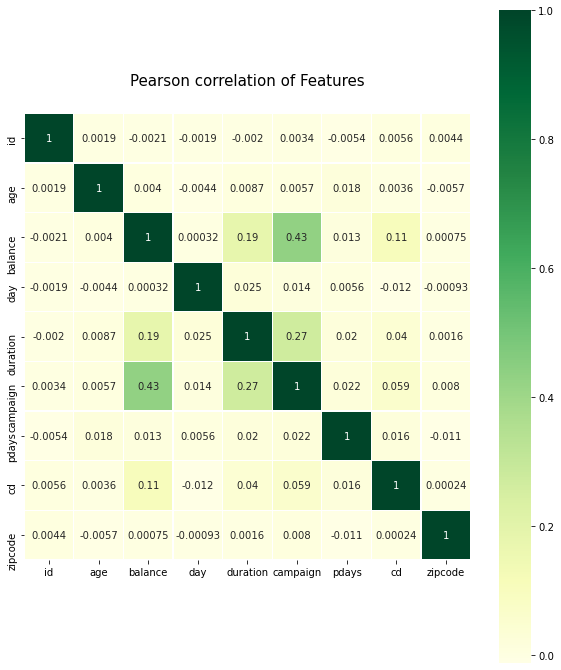

In [36]:

%matplotlib inline
corr = data.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

In [37]:
# import pandas as pd
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant

# # Assuming data is your dataframe
# # Adding a constant column for intercept, which is required for VIF calculation
# df_with_const = add_constant(data)

# # Calculating VIF for each column
# vif_data = pd.DataFrame()
# vif_data["Variable"] = df_with_const.columns
# vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# print(vif_data)


In [38]:
# no duplicates
data_dup= data[data.duplicated(keep= 'last')]
data_dup.shape

(0, 20)

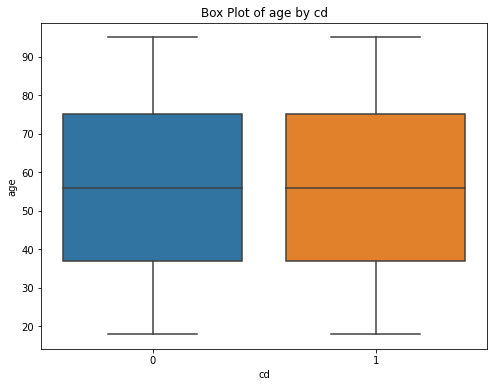

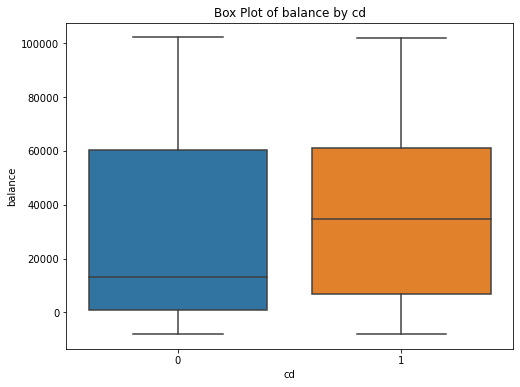

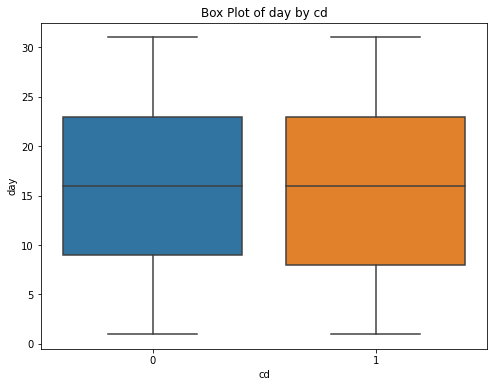

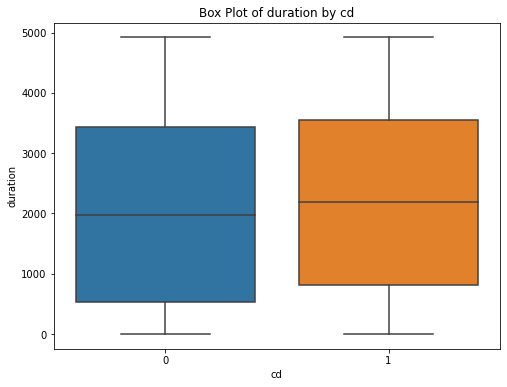

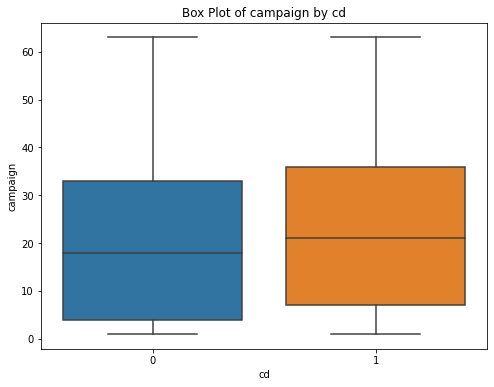

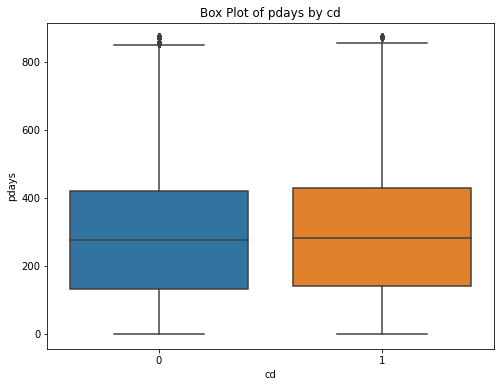

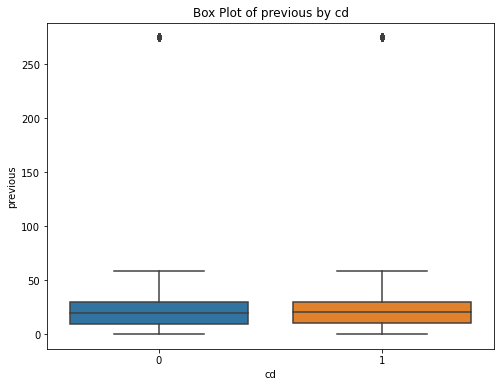

In [40]:
import seaborn as sns

for col in float_and_int_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='cd', y=col, data=data)
    plt.ylabel(col)
    plt.xlabel('cd')
    plt.title(f'Box Plot of {col} by cd')
    plt.show()




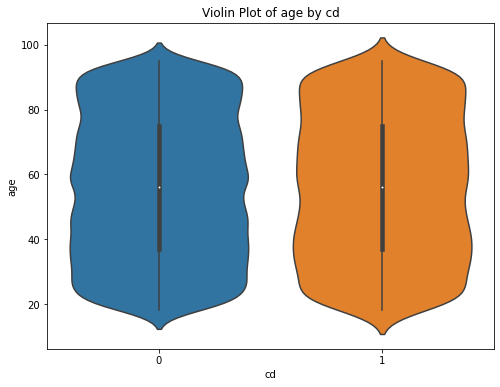

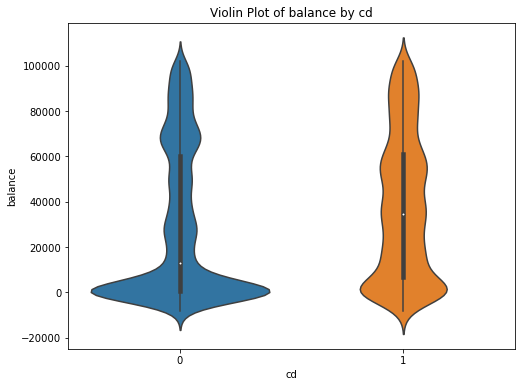

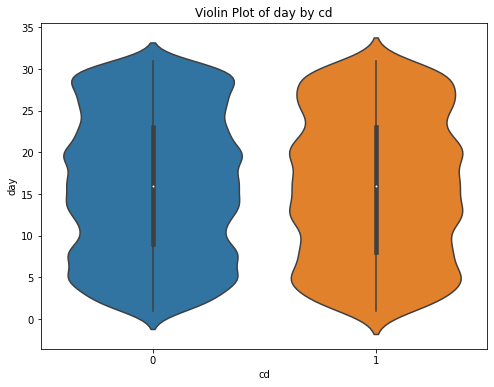

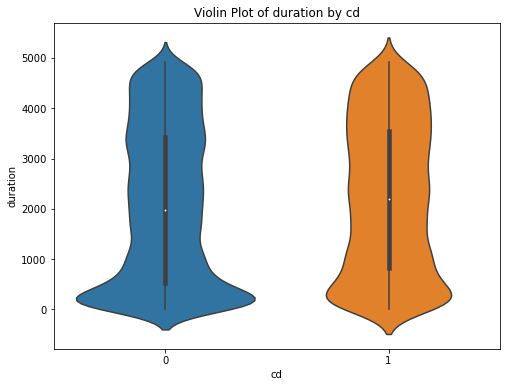

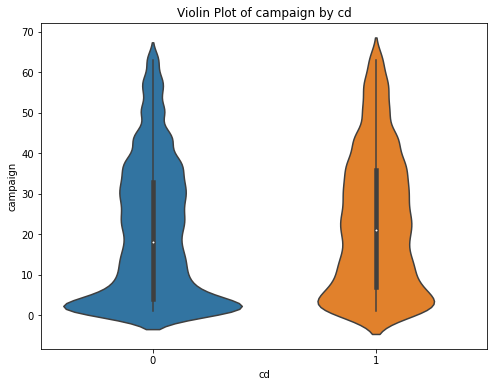

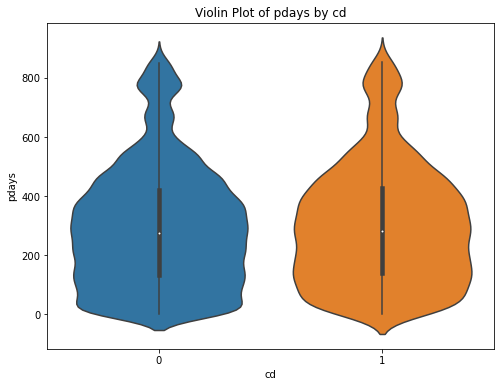

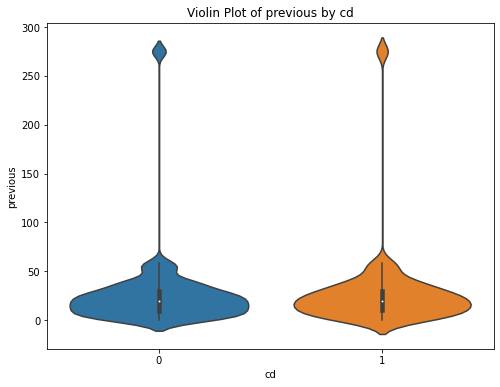

In [41]:
for col in float_and_int_columns:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='cd', y=col, data=data)
    plt.ylabel(col)
    plt.xlabel('cd')
    plt.title(f'Violin Plot of {col} by cd')
    plt.show()


In [18]:
import warnings
warnings.filterwarnings('ignore')

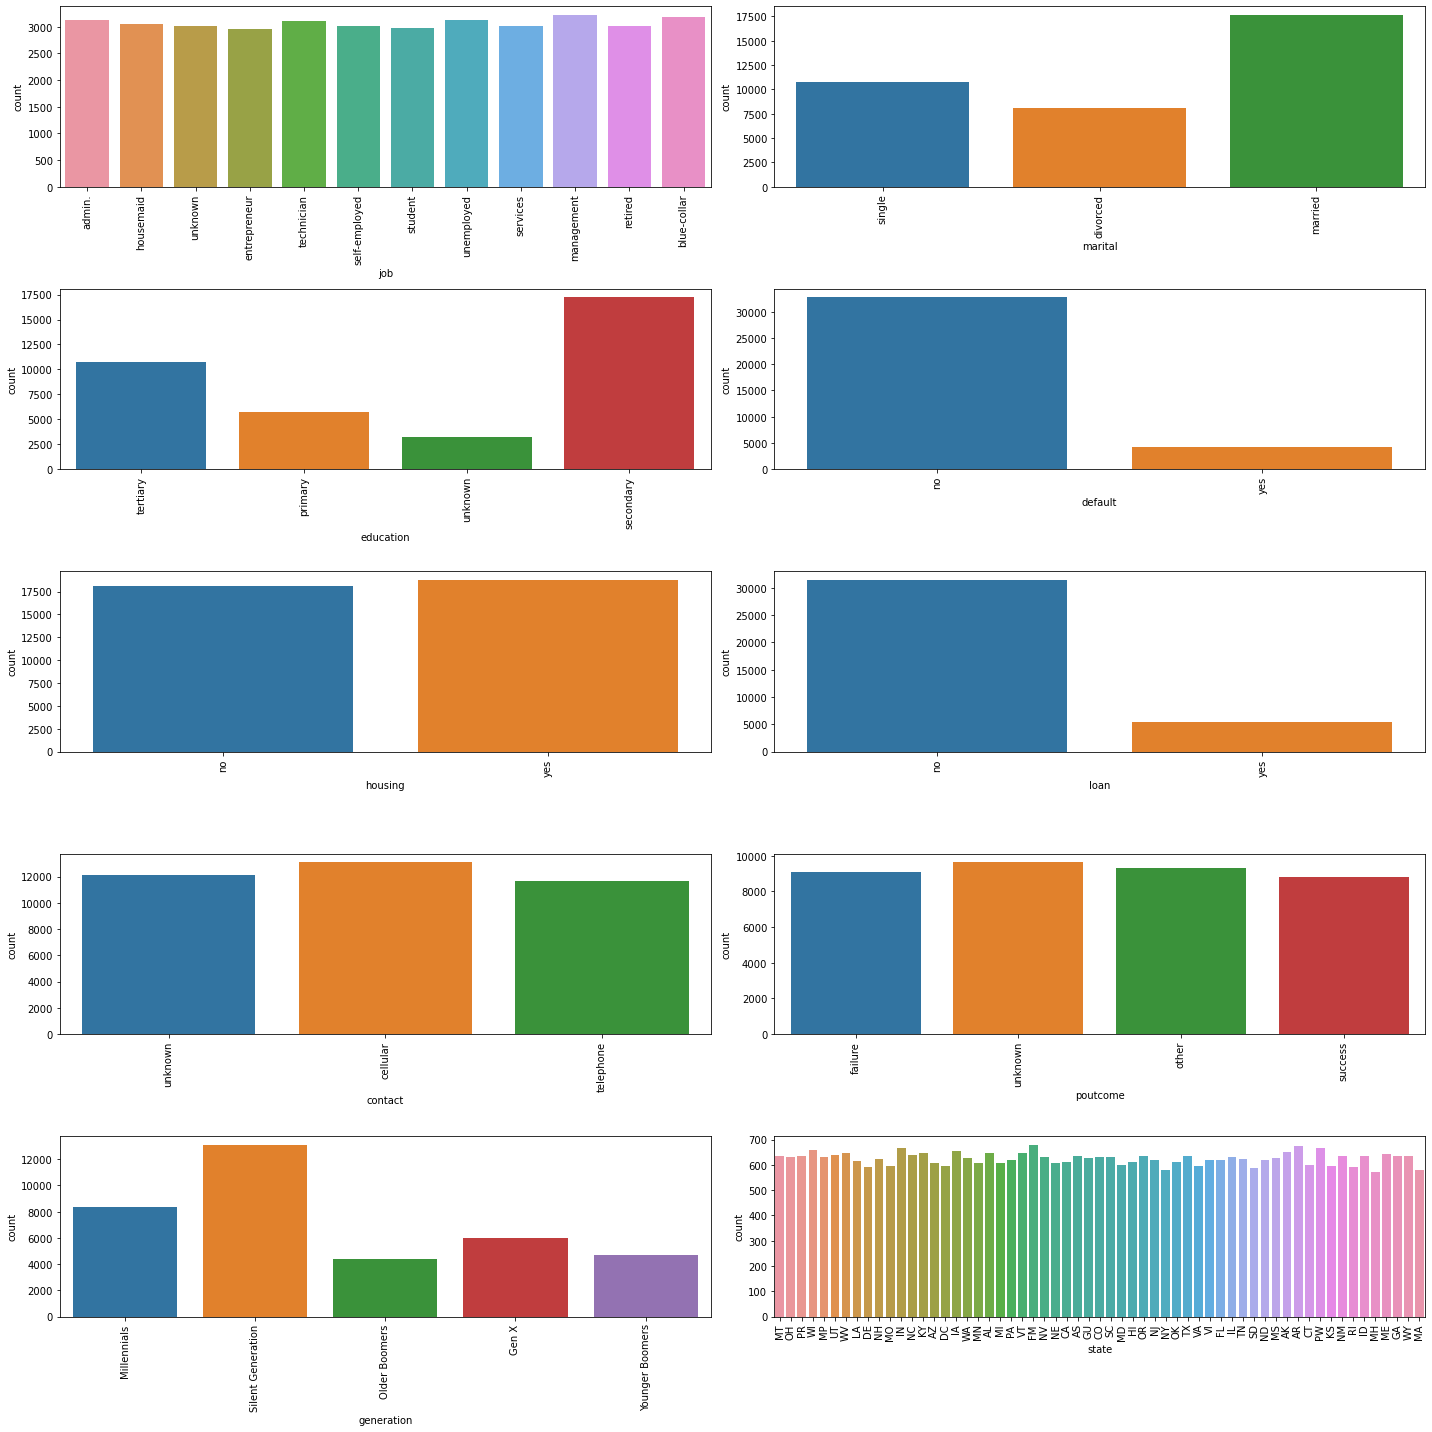

In [19]:
fig, ax = plt.subplots(5, 2, figsize=(20, 20))
for variable, subplot in zip(category_columns, ax.flatten()):
    sns.countplot(data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

plt.tight_layout()
plt.show()

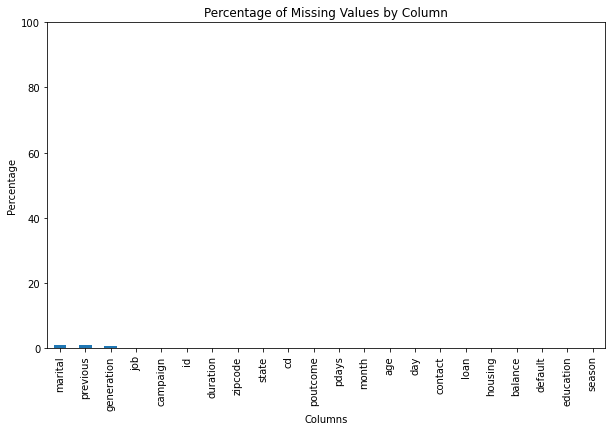

In [20]:
missing_percentage = data.isnull().sum() / len(data) * 100

# Plot
plt.figure(figsize=(10,6))
missing_percentage.sort_values(ascending=False).plot(kind='bar')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage')
plt.ylim([0,100])
plt.xlabel('Columns')
plt.show()

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def countplot_withY(label, dataset, hue_label="y"):
    plt.figure(figsize=(20,10))
    total = len(dataset)*1.
    ax = sns.countplot(x=label, data=dataset, hue=hue_label)
    
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), 
                    (p.get_x() + 0.1, p.get_height() + 5))
    
    # Put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
    
    # Adjust the ticklabel to the desired format, without changing the position of the ticks
    ax.set_yticklabels(['{:.1f}%'.format(v) for v in 100 * ax.yaxis.get_majorticklocs() / total])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.show()

# Sample usage
# data = ... (your dataframe should be loaded here)
# countplot_withY("your_column_label", data)


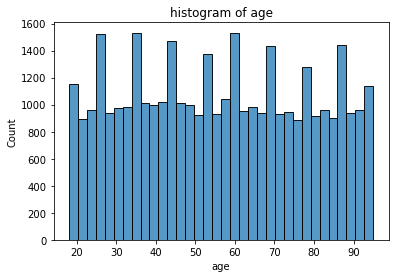

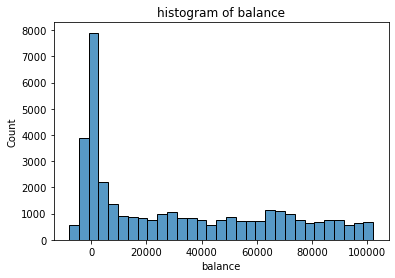

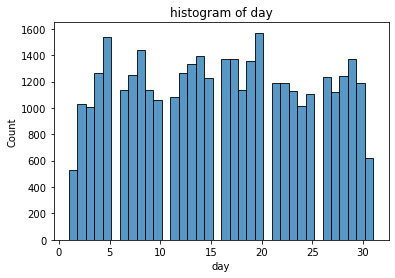

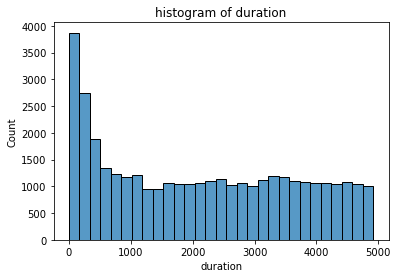

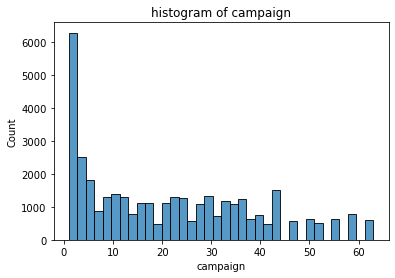

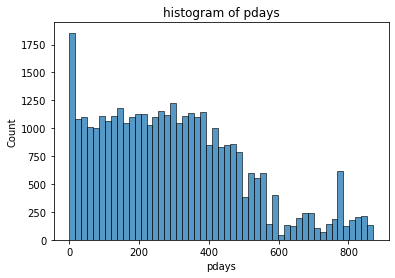

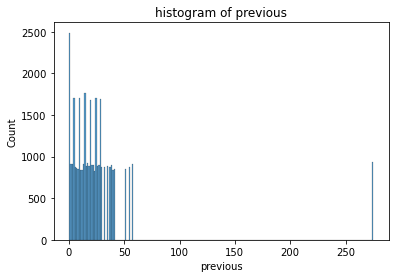

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


for i in float_and_int_columns:
    sns.histplot(data[i])
    plt.title('histogram of {}'.format(i))
    plt.show()

In [ ]:
np.log

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import make_column_transformer 
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold

In [24]:
df = data.dropna()

In [25]:
X = df.drop(['cd','day', 'month', 'zipcode'], axis=1)
y = df['cd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
float_and_int_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [27]:
preprocess = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),category_columns),
                                     (StandardScaler(), ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous'])
                                    )

X_train_encoded = preprocess.fit_transform(X_train)
X_test_encoded = preprocess.transform(X_test)

In [28]:
model_lr1 = make_pipeline(preprocess, LogisticRegression())

np.mean(cross_val_score( model_lr1, X_train, y_train, cv=5 ))

0.7637533644746581

In [29]:
param_grid = [{'logisticregression__C':np.logspace(-3,3,7)}              
             ]

grid = GridSearchCV(model_lr1, param_grid, cv=5)
grid.fit(X_train, y_train)
print('Score using train set. = ', grid.score(X_train, y_train))

Score using train set. =  0.7637883398034484


In [30]:
best_model = grid.best_estimator_
scores = best_model.score(X_test, y_test)
print('Score using Best model from Grid Search = ', scores)

Score using Best model from Grid Search =  0.7665407749335571


In [31]:
from sklearn.metrics import roc_curve, auc

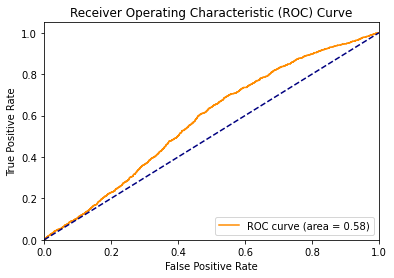

In [32]:
# Predict probabilities
y_pred_prob = grid.predict_proba(X_test)[:,1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Score using train set. =  0.8282097016752352


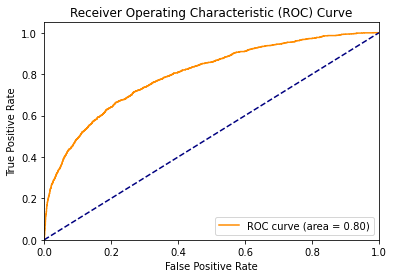

In [33]:
param_grid = {
    'xgbclassifier__n_estimators': [50, 100, 150],
    'xgbclassifier__learning_rate': [0.01, 0.05, 0.1],
    'xgbclassifier__max_depth': [3, 4, 5]
}
from xgboost import XGBClassifier
model_xgb = make_pipeline(preprocess, XGBClassifier())

grid = GridSearchCV(model_xgb, param_grid, cv=5)
grid.fit(X_train, y_train)
print('Score using train set. = ', grid.score(X_train, y_train))

# Predict probabilities
y_pred_prob = grid.predict_proba(X_test)[:,1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()